In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [34]:
purchase_behaviour = pd.read_csv(r"C:\Users\sonia\Downloads\hiring-task-data-20250205T064543Z-001\hiring-task-data\purchase_behaviour.csv")
transaction_data = pd.read_csv(r"C:\Users\sonia\Downloads\hiring-task-data-20250205T064543Z-001\hiring-task-data\transaction_data.csv")

In [35]:
print(purchase_behaviour.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [36]:
print(transaction_data.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [37]:
print("Missing values in purchase_behaviour:")
print(purchase_behaviour.isnull().sum())
print("\nMissing values in transaction_data:")
print(transaction_data.isnull().sum())
print("\nData types in transaction_data:")
print(transaction_data.dtypes)
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], unit='D', origin='1899-12-30')

Missing values in purchase_behaviour:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Missing values in transaction_data:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Data types in transaction_data:
DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [48]:
df = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR', how='left')
print("\nMerged DataFrame:")
print(df.head())


Merged DataFrame:
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES

In [49]:
product_sales = df.groupby(['PROD_NBR', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()
top_products = product_sales.sort_values(by='TOT_SALES', ascending=False)
top_3_products = top_products.head(3)
print("Top 3 Best-Selling Products (by Total Sales):")
print(top_3_products)

Top 3 Best-Selling Products (by Total Sales):
    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


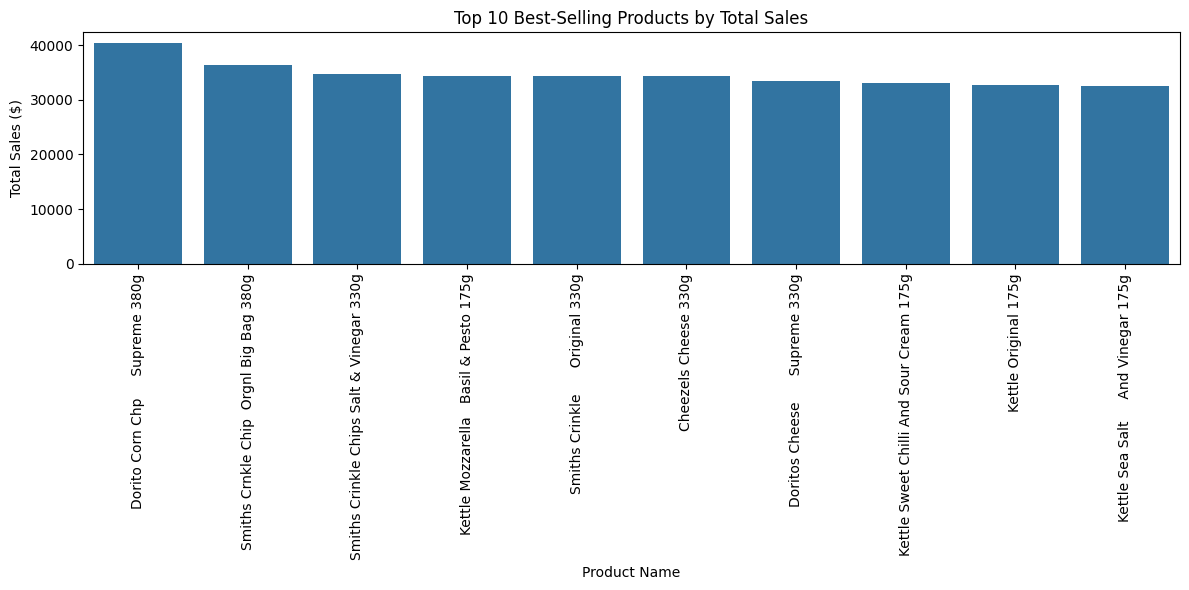

In [50]:
top_10_products = top_products.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_products, x='PROD_NAME', y='TOT_SALES')
plt.xticks(rotation=90)
plt.title('Top 10 Best-Selling Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

In [52]:
customer_transactions = df.groupby('LYLTY_CARD_NBR').size().reset_index(name='transaction_count')
transaction_threshold = customer_transactions['transaction_count'].quantile(0.75)
loyal_customers = customer_transactions[customer_transactions['transaction_count'] >= transaction_threshold]
print("Number of Loyal Customer by TRansactions:", loyal_customers.shape[0])

Number of Loyal Customer by TRansactions: 23366


In [54]:
customer_spend = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
spend_threshold = customer_spend['TOT_SALES'].quantile(0.75)
loyal_customers = customer_spend[customer_spend['TOT_SALES'] >= spend_threshold]
print("Number of Loyal Customers by Spend:", loyal_customers.shape[0])

Number of Loyal Customers by Spend: 18221


In [55]:

loyal_customer_ids = loyal_customers['LYLTY_CARD_NBR']

loyal_df = df[df['LYLTY_CARD_NBR'].isin(loyal_customer_ids)]



loyal_customer_data = loyal_df[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates()


lifestage_counts = loyal_customer_data['LIFESTAGE'].value_counts(normalize=True) * 100


premium_counts = loyal_customer_data['PREMIUM_CUSTOMER'].value_counts(normalize=True) * 100

print("LIFESTAGE Distribution among Loyal Customers (%):")
print(lifestage_counts)

print("\nPREMIUM_CUSTOMER Distribution among Loyal Customers (%):")
print(premium_counts)

LIFESTAGE Distribution among Loyal Customers (%):
LIFESTAGE
OLDER FAMILIES            24.323583
YOUNG FAMILIES            21.332528
OLDER SINGLES/COUPLES     20.251358
RETIREES                  16.091323
MIDAGE SINGLES/COUPLES     8.901817
YOUNG SINGLES/COUPLES      7.562702
NEW FAMILIES               1.536688
Name: proportion, dtype: float64

PREMIUM_CUSTOMER Distribution among Loyal Customers (%):
PREMIUM_CUSTOMER
Budget        36.842105
Mainstream    36.671972
Premium       26.485923
Name: proportion, dtype: float64


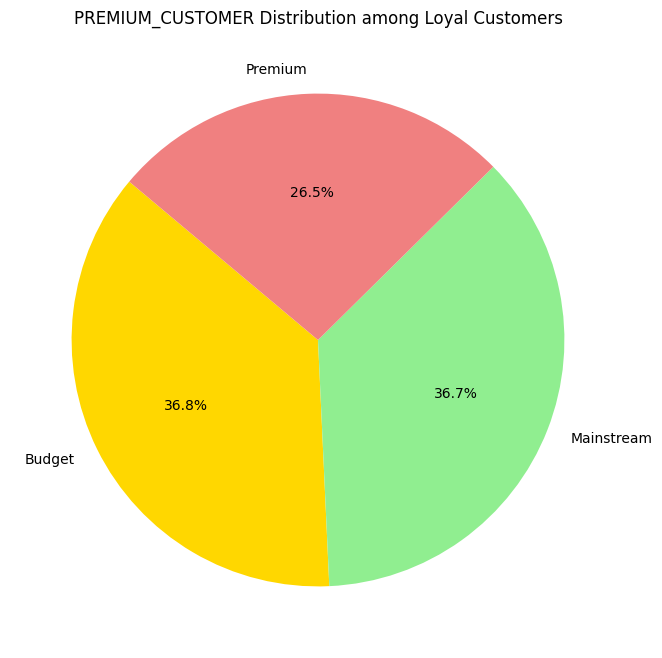

In [56]:
plt.figure(figsize=(8,8))
premium_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral'])
plt.title('PREMIUM_CUSTOMER Distribution among Loyal Customers')
plt.ylabel('')  
plt.show()

In [57]:
loyal_product_sales = loyal_df.groupby(['PROD_NBR', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()

loyal_top_products = loyal_product_sales.sort_values(by='TOT_SALES', ascending=False)

print("Top 5 Products Purchased by Loyal Customers (by Total Sales):")
print(loyal_top_products.head(5))

Top 5 Products Purchased by Loyal Customers (by Total Sales):
     PROD_NBR                                 PROD_NAME  TOT_SALES
3           4          Dorito Corn Chp     Supreme 380g    24615.5
13         14    Smiths Crnkle Chip  Orgnl Big Bag 380g    20891.9
15         16  Smiths Crinkle Chips Salt & Vinegar 330g    19784.7
22         23                      Cheezels Cheese 330g    19362.9
101       102    Kettle Mozzarella   Basil & Pesto 175g    19024.2


In [58]:
product_comparison = pd.merge(
    top_products[['PROD_NBR', 'PROD_NAME', 'TOT_SALES']].rename(columns={'TOT_SALES': 'Total_Sales_All_Customers'}),
    loyal_top_products[['PROD_NBR', 'TOT_SALES']].rename(columns={'TOT_SALES': 'Total_Sales_Loyal_Customers'}),
    on='PROD_NBR',
    how='left'
)
product_comparison['Loyal_Customer_Sales_%'] = (product_comparison['Total_Sales_Loyal_Customers'] / product_comparison['Total_Sales_All_Customers']) * 100

print("Product Sales Comparison:")
print(product_comparison.head(10))

Product Sales Comparison:
   PROD_NBR                                 PROD_NAME  \
0         4          Dorito Corn Chp     Supreme 380g   
1        14    Smiths Crnkle Chip  Orgnl Big Bag 380g   
2        16  Smiths Crinkle Chips Salt & Vinegar 330g   
3       102    Kettle Mozzarella   Basil & Pesto 175g   
4         7         Smiths Crinkle      Original 330g   
5        23                      Cheezels Cheese 330g   
6        20          Doritos Cheese      Supreme 330g   
7        89   Kettle Sweet Chilli And Sour Cream 175g   
8        46                      Kettle Original 175g   
9        32      Kettle Sea Salt     And Vinegar 175g   

   Total_Sales_All_Customers  Total_Sales_Loyal_Customers  \
0                    40352.0                      24615.5   
1                    36367.6                      20891.9   
2                    34804.2                      19784.7   
3                    34457.4                      19024.2   
4                    34302.6             